In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

import shap
# load JS visualization code to notebook
shap.initjs()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Generating Process

* Many observations
* Even more features
* Only a few relevant features
* With non-linear relationship

In [2]:
# assume we don't know
N = 950
k = 1_000

X = np.random.uniform(-1,1,size=(N,k))
i,j = np.random.randint(0,k, size=2)
y = 100*X[:,i]*X[:,j]**2+X[:,i]**2 + np.random.normal(0,3,(N,))

# Simple model

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [4]:
model = LinearRegression().fit(X_train,y_train)
model.score(X_test,y_test)

-0.6910580937656923

Linear models don't work well when you have more features than observations...don't even start about adding interactions

In [5]:
# don't try this at home
if 0 == 1:
    model = LinearRegression().fit(PolynomialFeatures(degree=3).fit_transform(X_train),y_train)
    model.score(PolynomialFeatures(degree=3).fit_transform(X_test),y_test)

# Complicated model

In [6]:
model = RandomForestRegressor(n_estimators=100).fit(X_train,y_train)
model.score(X_test,y_test)

0.9405519544086715

# Explainer

In [7]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)


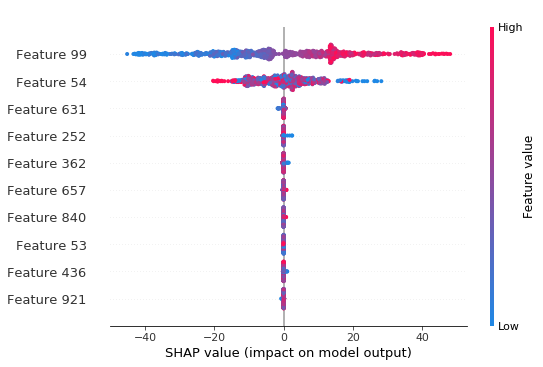

In [8]:
shap.summary_plot(shap_values, X,max_display=10)


In [9]:
shap.force_plot(explainer.expected_value, 
                shap_values[:,[i,j]],
                X[:,[i,j]])

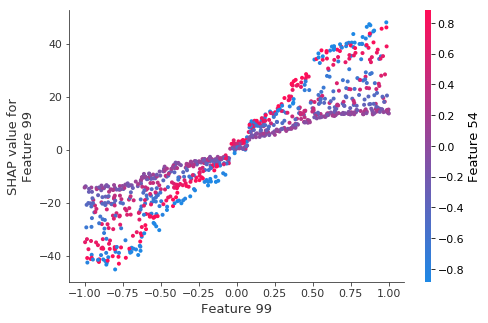

In [10]:
shap.dependence_plot(f"Feature {i}", shap_values, X, show=False)


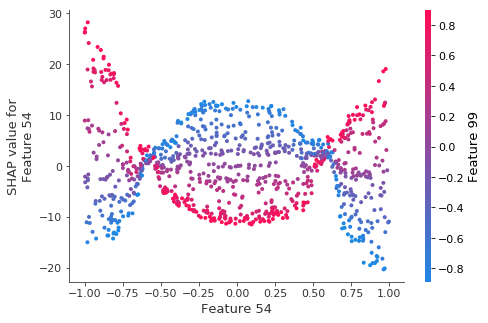

In [11]:
shap.dependence_plot(f"Feature {j}", shap_values, X, show=False)


# Simpler model

We have learned: 
* There are only two relevant features
* They have non-linear relationship and interactions

Hence we add polynomial features to our linear model...

In [12]:
poly = PolynomialFeatures(degree=3)

X_train_poly = poly.fit_transform(X_train[:,[i,j]])
X_test_poly = poly.fit_transform(X_test[:,[i,j]])

model = LinearRegression().fit(X_train_poly,y_train)
model.score(X_test_poly,y_test)

0.9833733787314681

And from here you can simply look at the coefficients...